In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix


In [84]:
file_path = '/content/SILKYSKY_DATA_CW2 (S).csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

In [85]:
data.head()

,Ref,id,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance,Destination,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,Male,Y,13,Under 18,Personal Travel,Eco Plus,4760,India,...,5,5,4,3,4,4,5,5,25,18.0
1,1,5047,Male,N,25,25 to 34,Business travel,Business,235,Republic of Ireland,...,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,Female,Y,26,25 to 34,Business travel,Business,4760,India,...,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,Female,Y,25,25 to 34,Business travel,Business,560,Norway,...,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,Male,Y,61,55 to 64,Business travel,Business,4760,India,...,5,3,3,4,4,3,3,3,0,0.0


In [86]:


# Convert 'Satisfied' column to numerical values
data['Satisfied'] = data['Satisfied'].map({'Y': 1, 'N': 0})


In [87]:
data.head()

,Ref,id,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance,Destination,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,Male,1,13,Under 18,Personal Travel,Eco Plus,4760,India,...,5,5,4,3,4,4,5,5,25,18.0
1,1,5047,Male,0,25,25 to 34,Business travel,Business,235,Republic of Ireland,...,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,Female,1,26,25 to 34,Business travel,Business,4760,India,...,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,Female,1,25,25 to 34,Business travel,Business,560,Norway,...,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,Male,1,61,55 to 64,Business travel,Business,4760,India,...,5,3,3,4,4,3,3,3,0,0.0


In [88]:
data.tail()

,Ref,id,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance,Destination,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
103899,103899,94171,Female,0,23,18 to 24,Business travel,Eco,4760,India,...,2,2,3,1,4,2,3,2,3,0.0
103900,103900,73097,Male,1,49,45 to 54,Business travel,Business,4760,India,...,5,5,5,5,5,5,5,4,0,0.0
103901,103901,68825,Male,0,30,25 to 34,Business travel,Business,4760,India,...,5,4,3,2,4,5,5,4,7,14.0
103902,103902,54173,Female,0,22,18 to 24,Business travel,Eco,4760,India,...,1,1,4,5,1,5,4,1,0,0.0
103903,103903,62567,Male,1,27,25 to 34,Business travel,Business,4760,India,...,1,1,1,1,4,4,3,1,0,0.0


In [89]:
data.describe()


,Ref,id,Satisfied,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,0.817293,39.379706,4164.071066,2.522319,3.060248,2.756852,2.976825,3.202023,...,3.398666,3.358071,3.382247,3.350930,3.631708,3.304185,3.640331,3.286245,14.818390,15.181275
std,29994.645522,37463.812252,0.386428,15.114964,1346.755749,1.447848,1.525143,1.398993,1.277703,1.329625,...,1.365819,1.333104,1.288478,1.315715,1.181056,1.265501,1.175822,1.312373,38.313911,38.774453
min,0.000000,1.000000,0.000000,7.000000,235.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,1.000000,27.000000,4760.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,1.000000,40.000000,4760.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,1.000000,51.000000,4760.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,1.000000,85.000000,5940.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [90]:
data.isnull().sum()


,0
Ref,0
id,0
Gender,0
Satisfied,0
Age,0
Age Band,0
Type of Travel,0
Class,0
Flight Distance,0
Destination,0


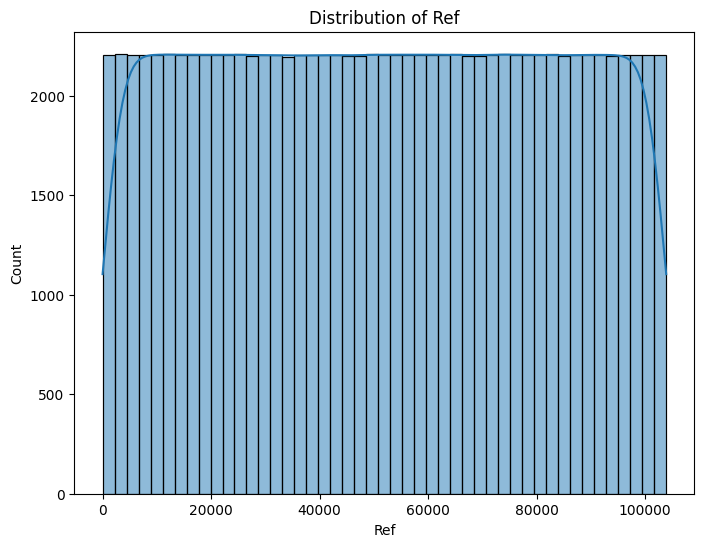

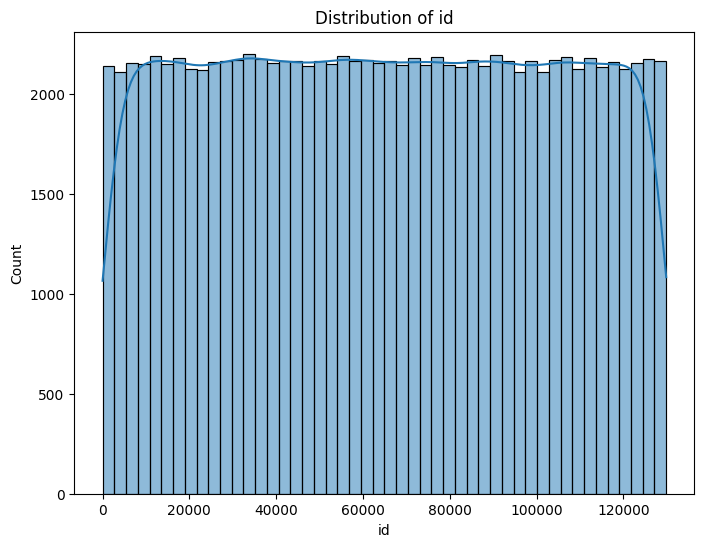

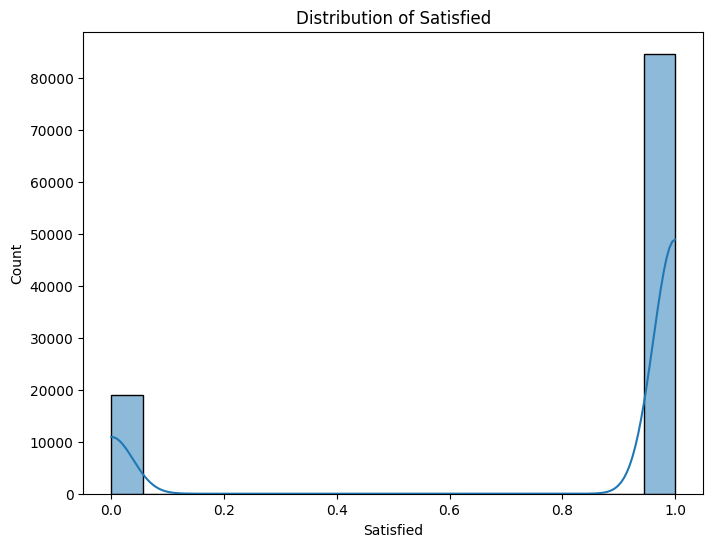

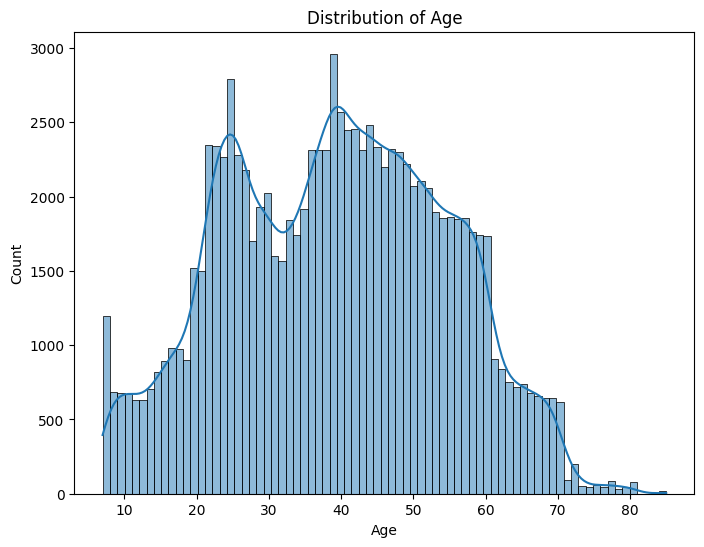

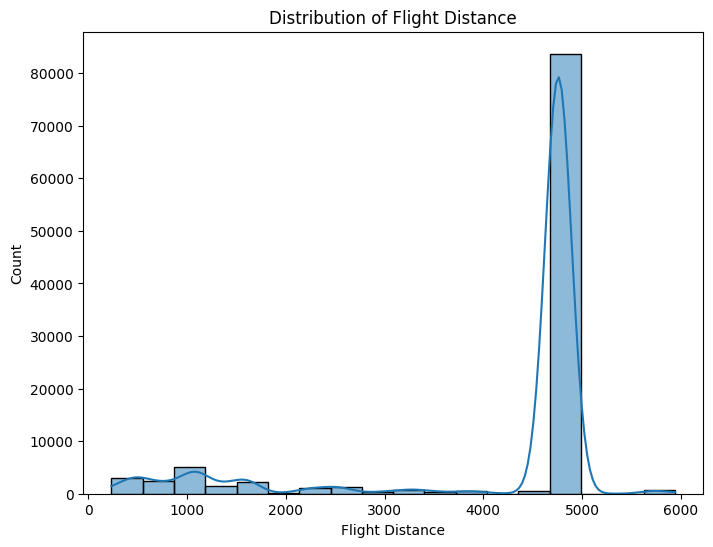

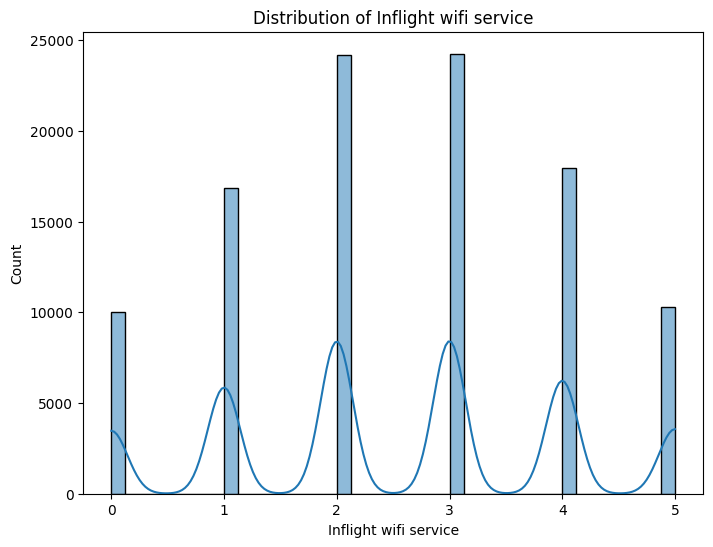

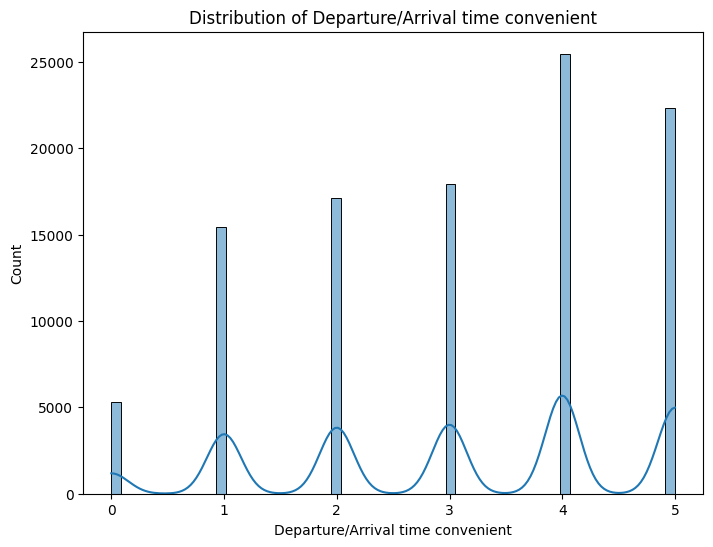

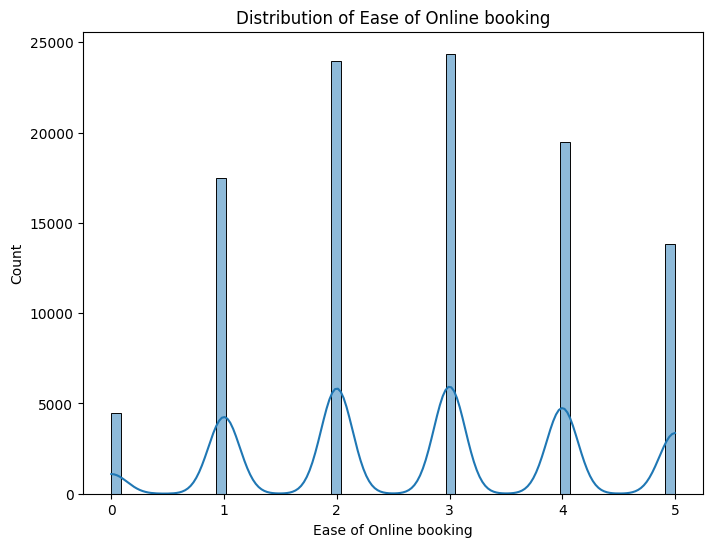

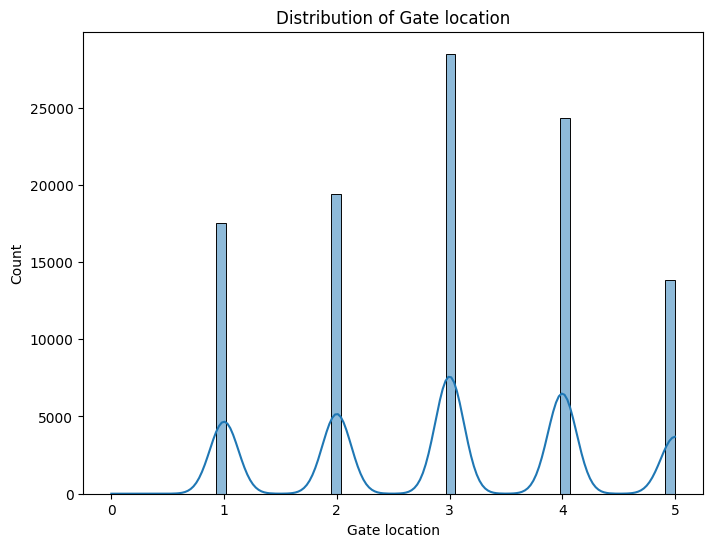

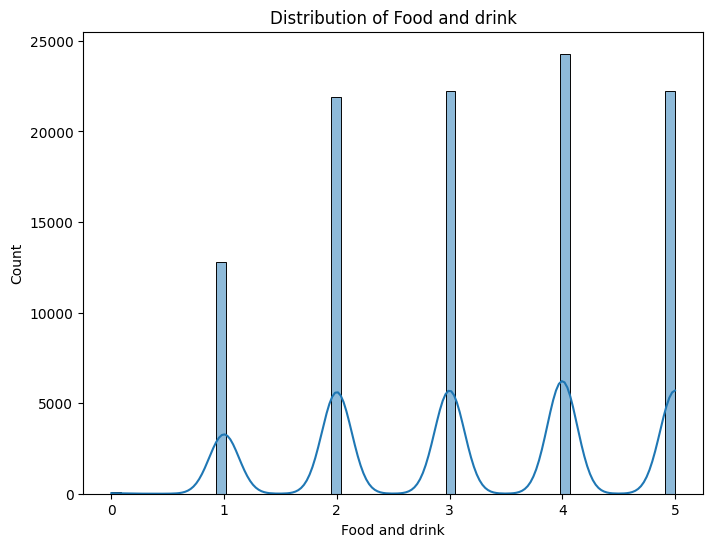

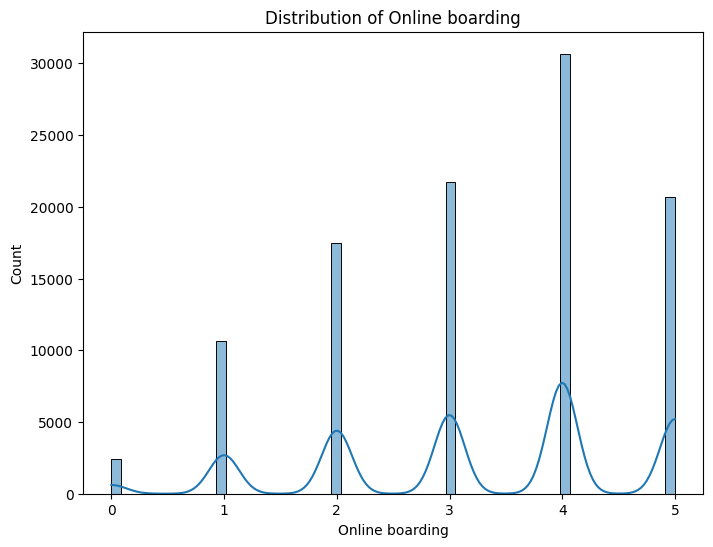

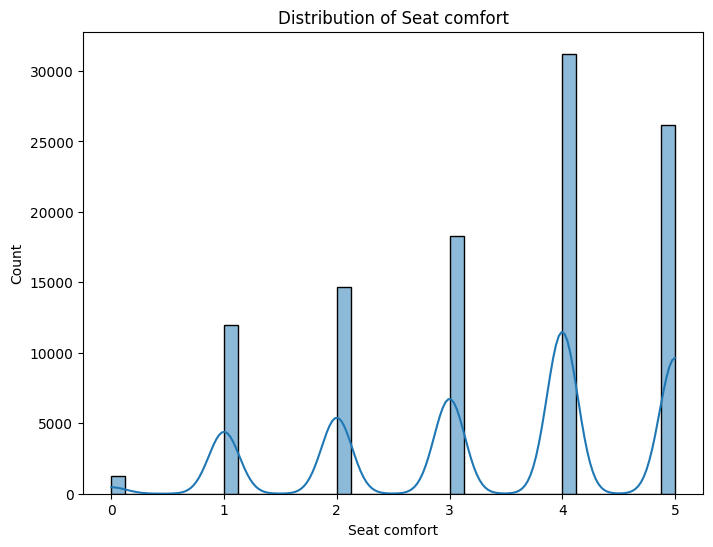

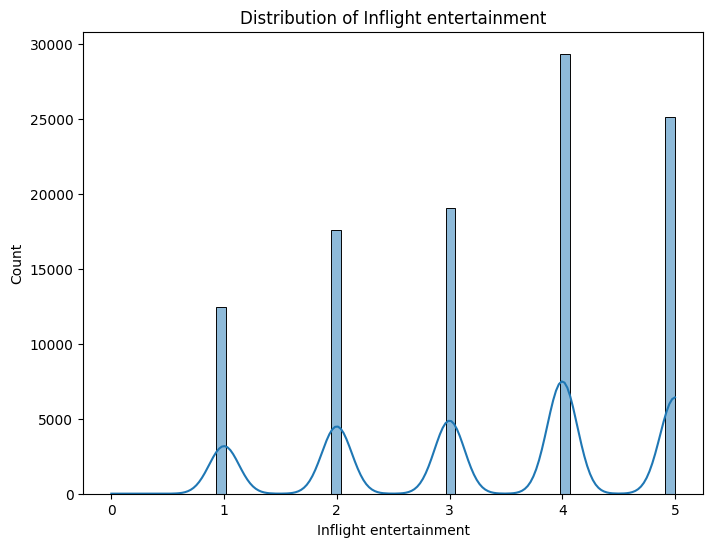

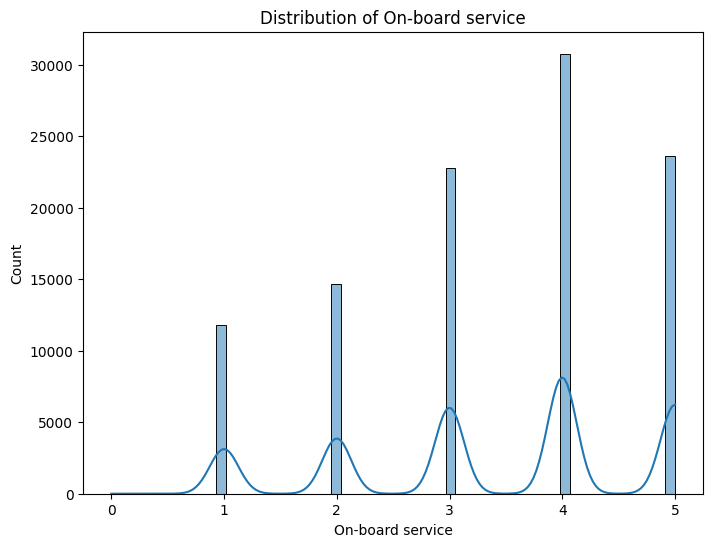

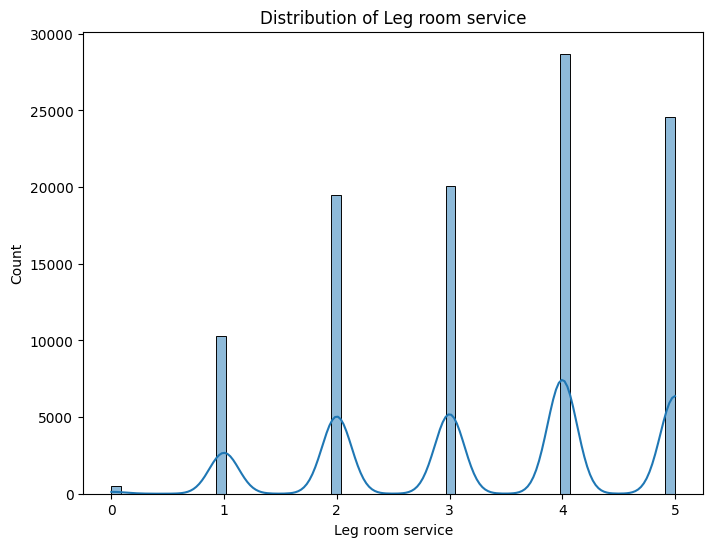

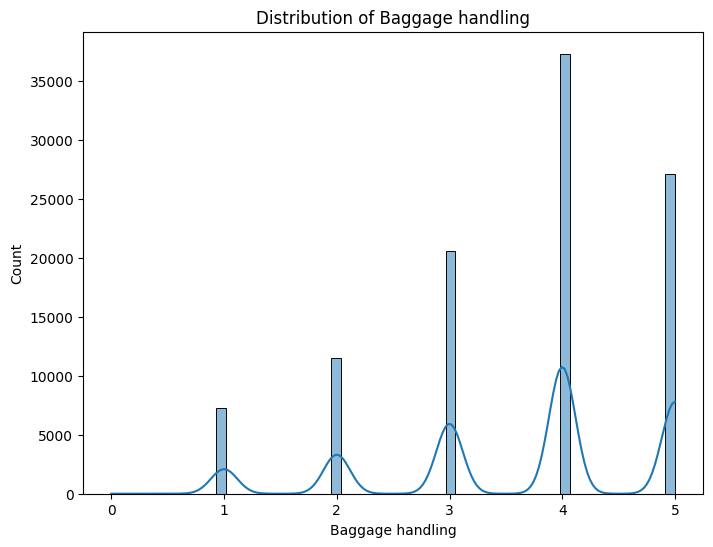

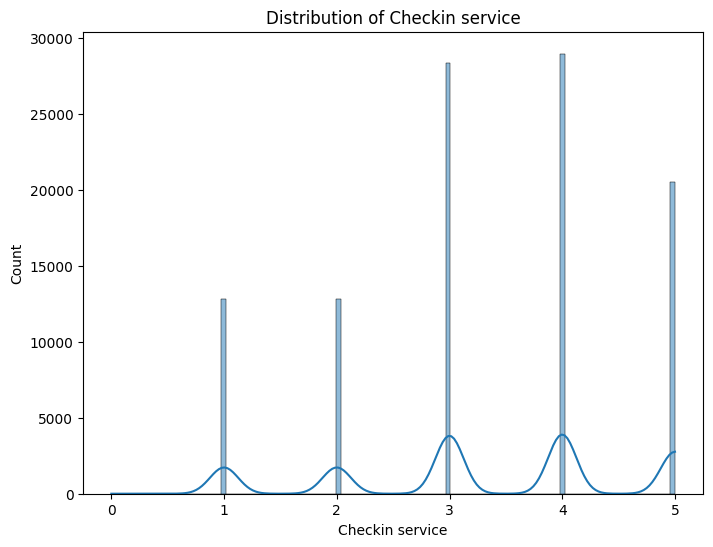

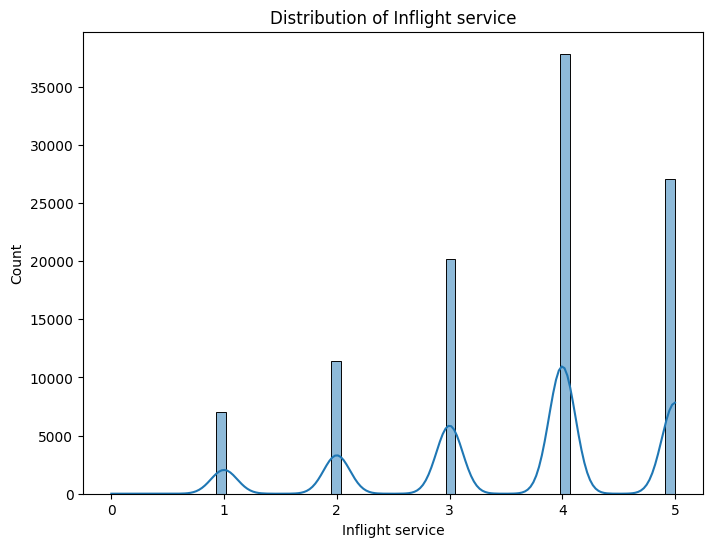

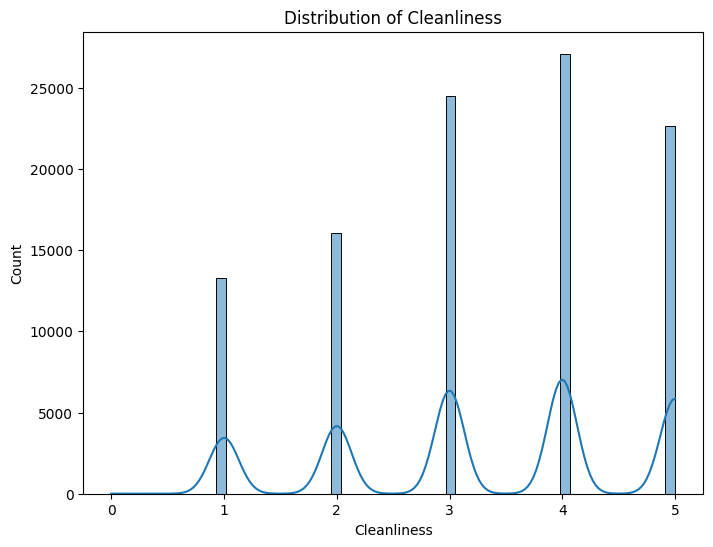

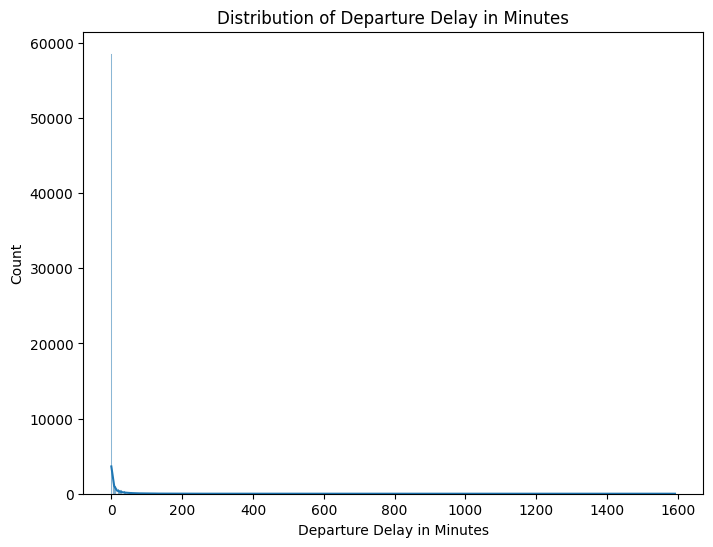

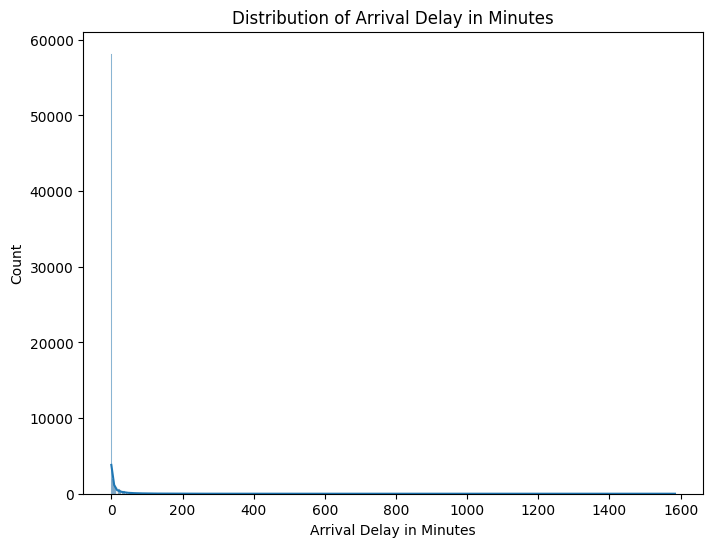

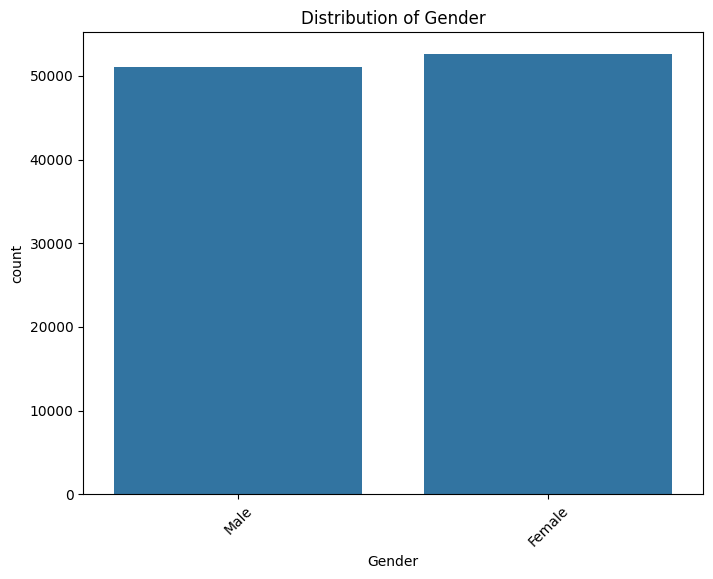

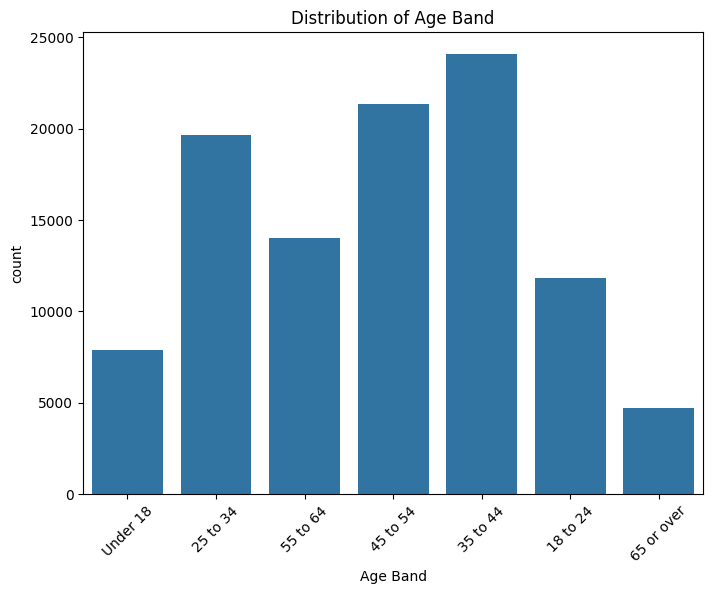

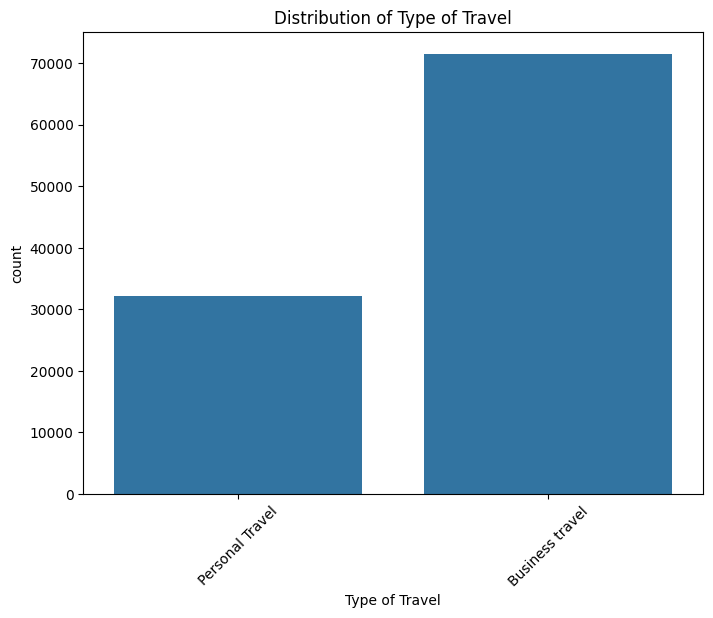

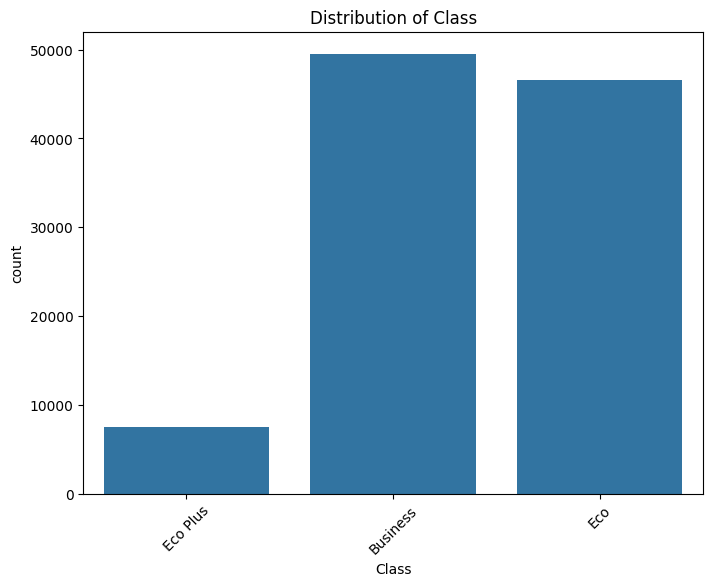

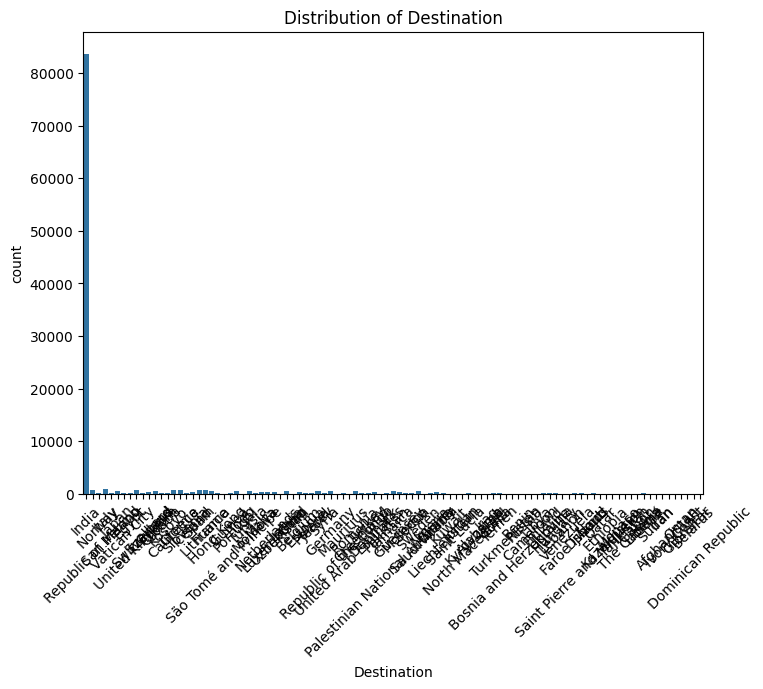

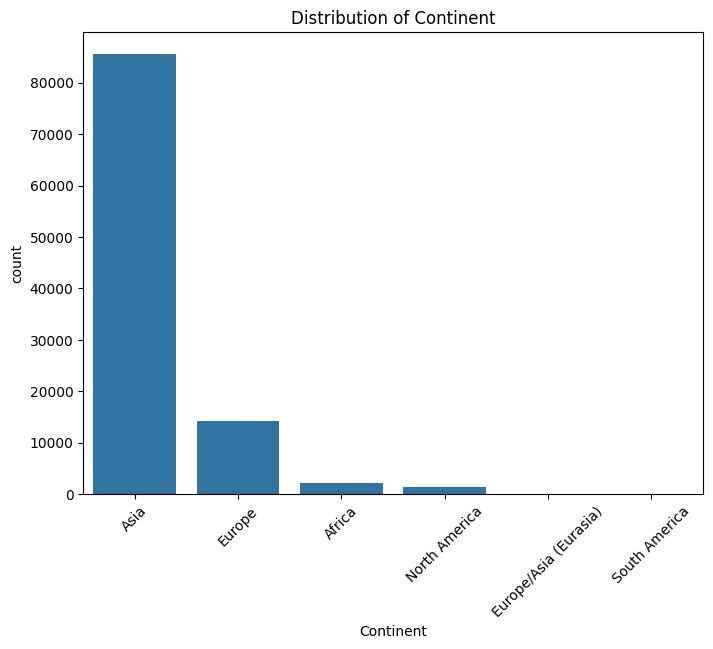

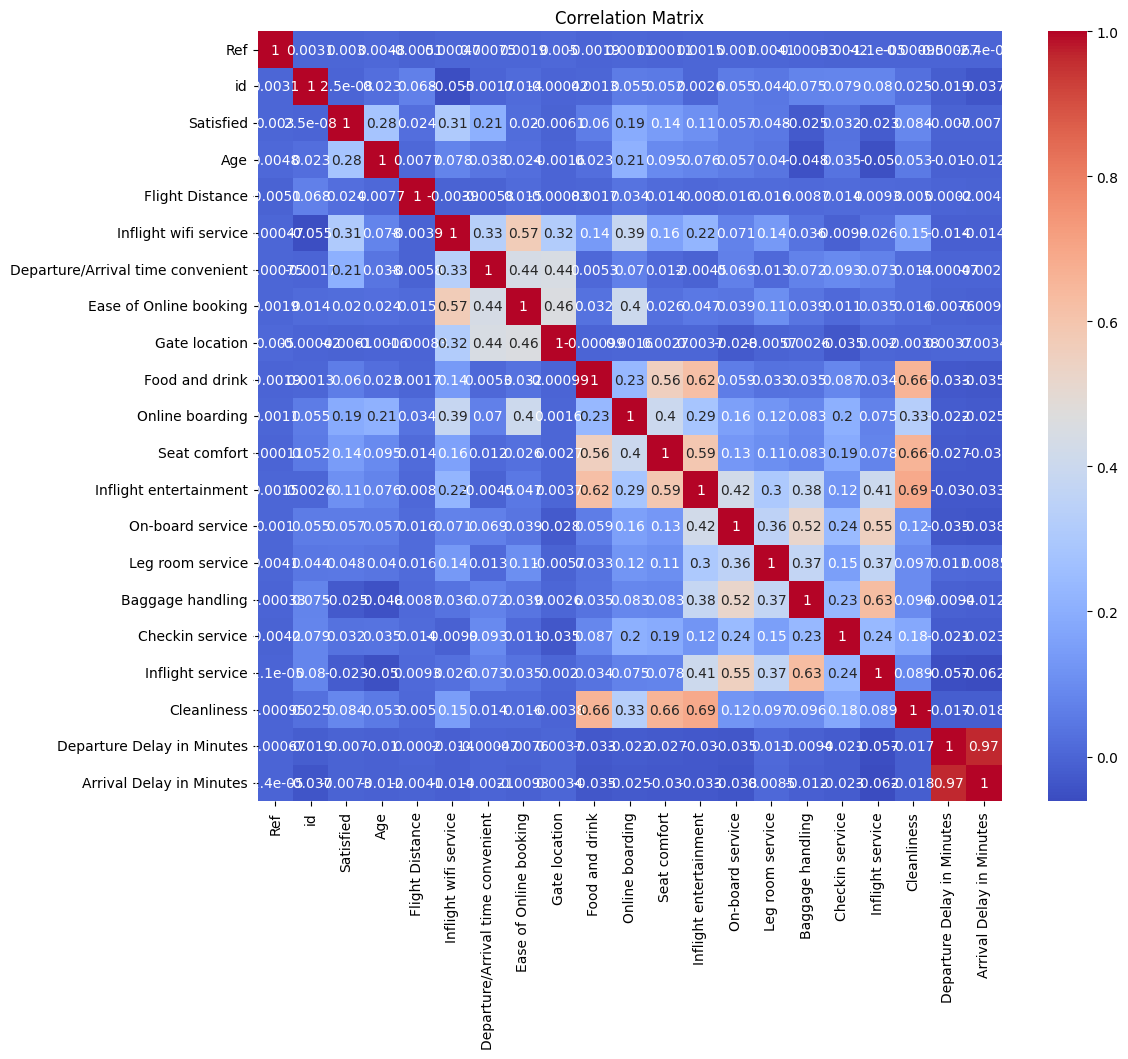

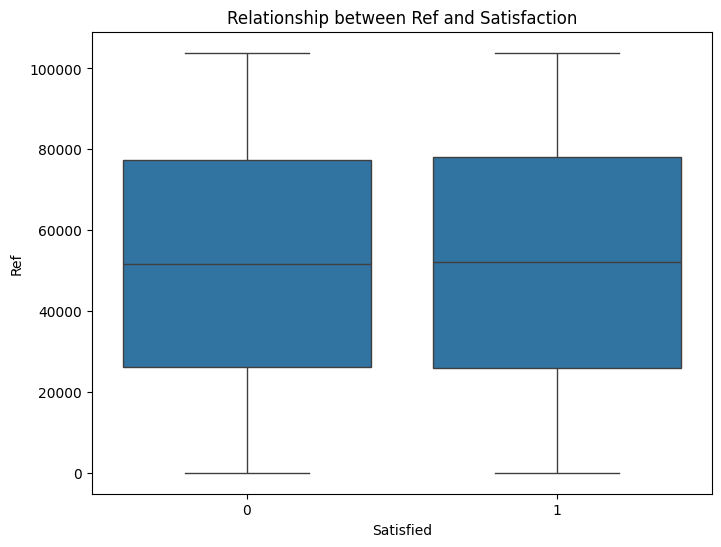

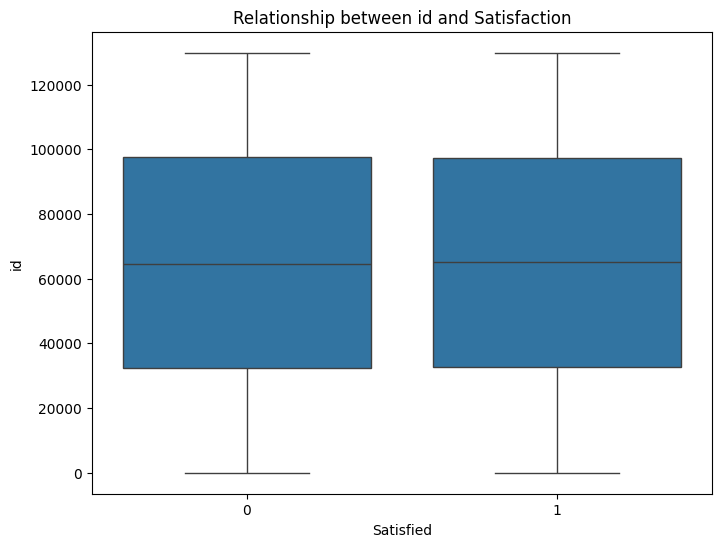

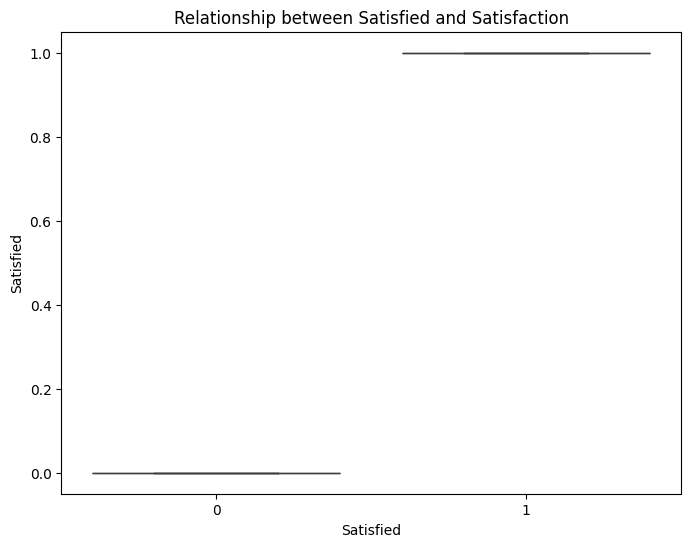

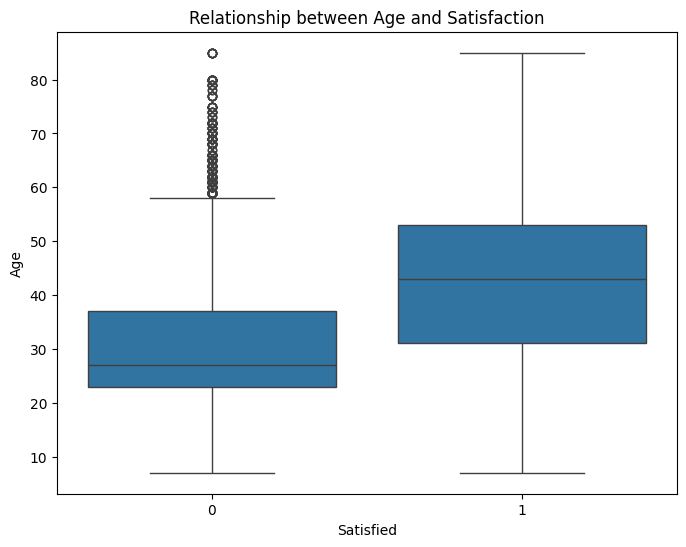

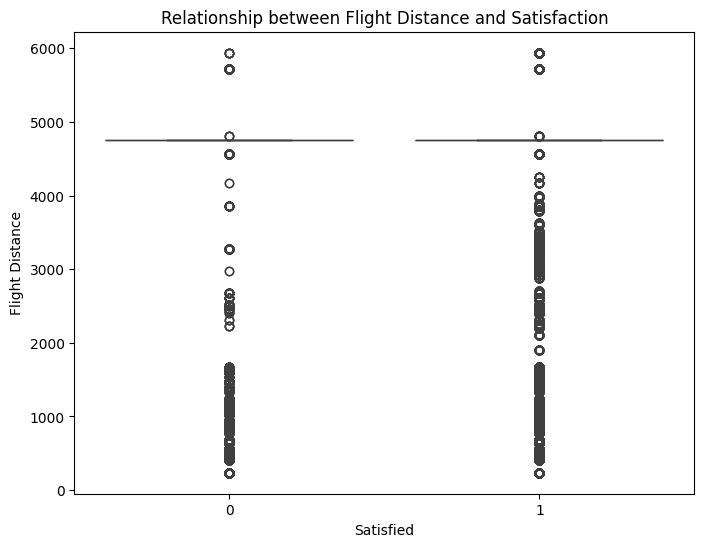

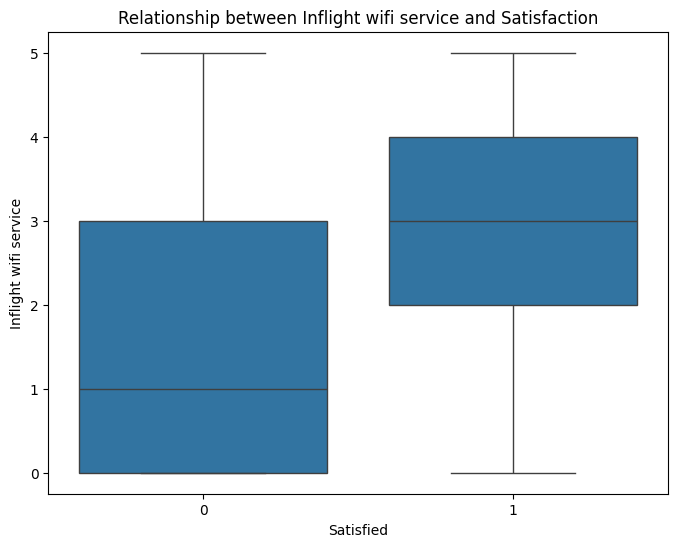

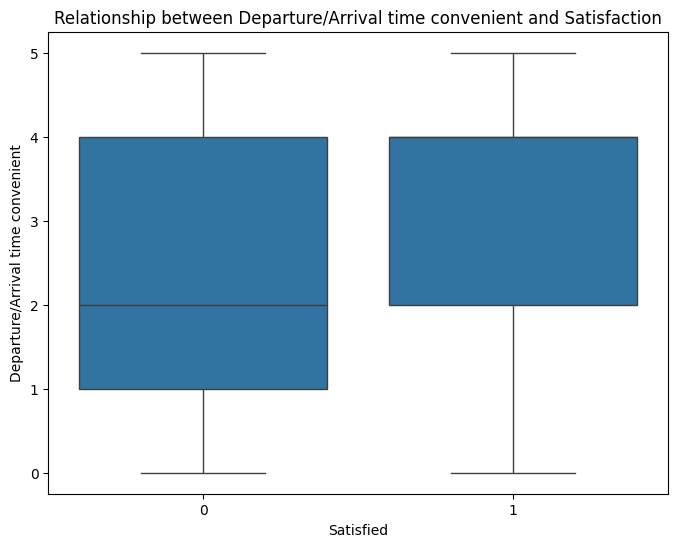

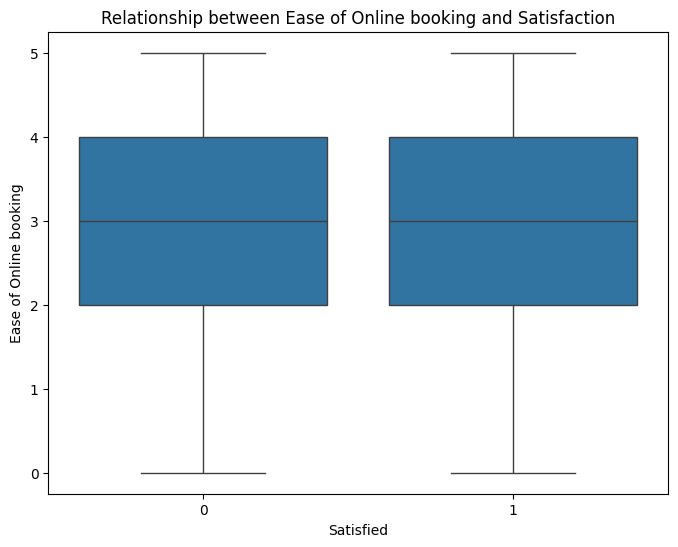

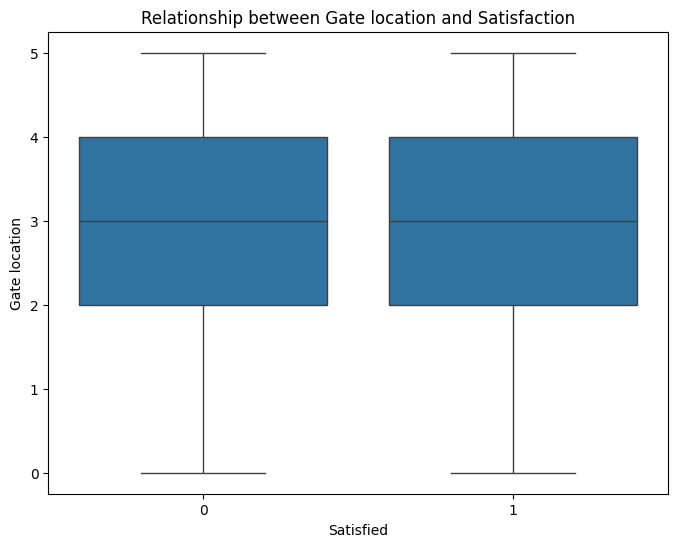

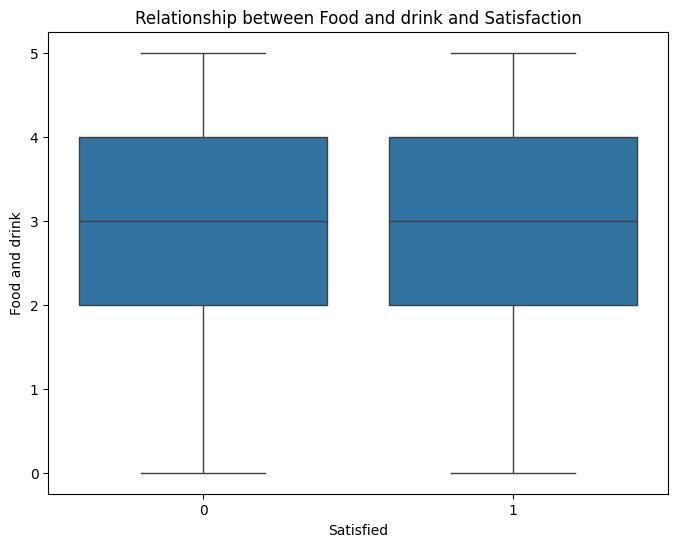

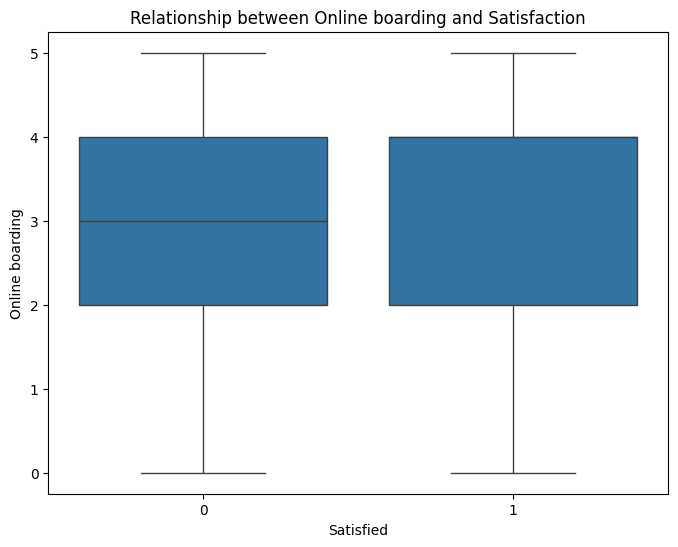

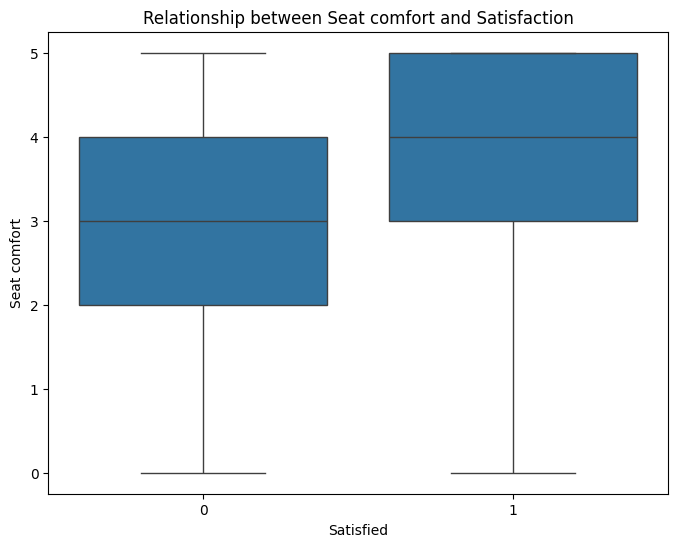

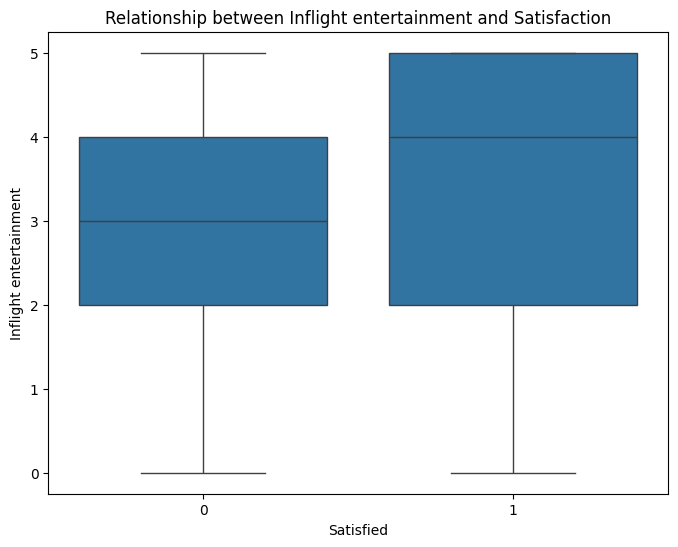

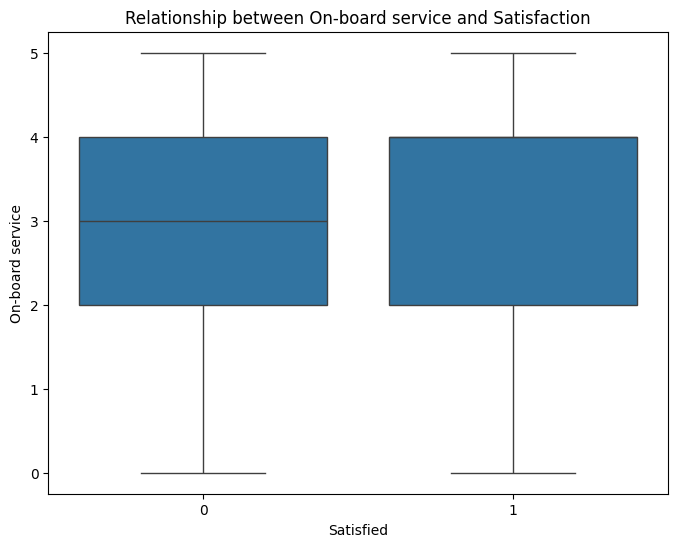

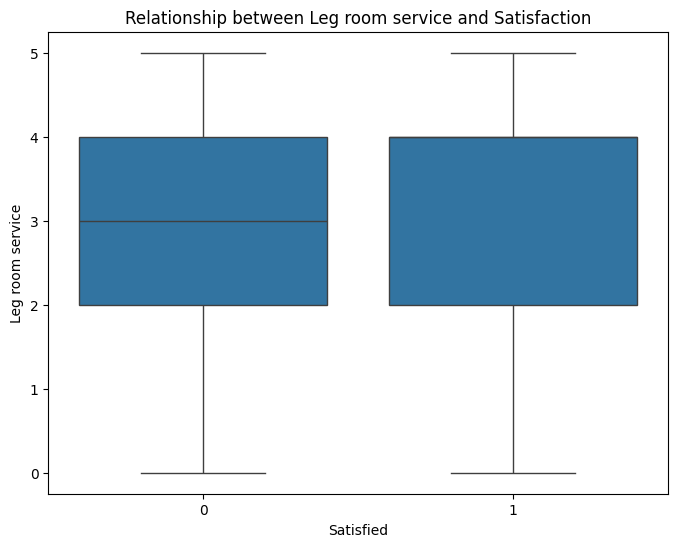

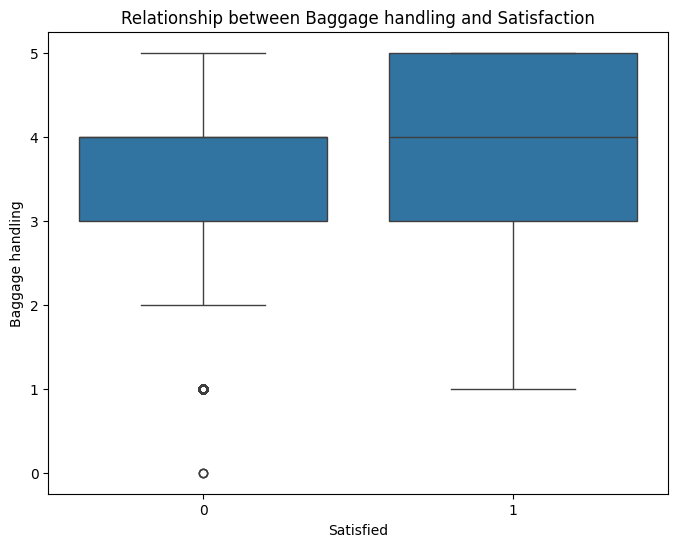

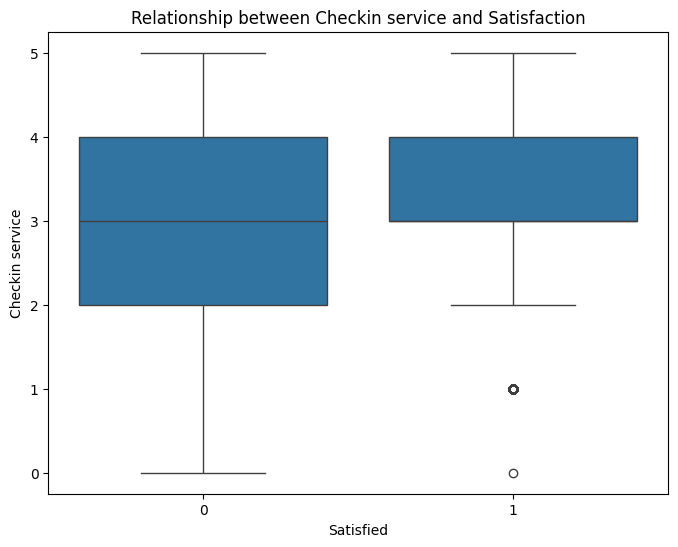

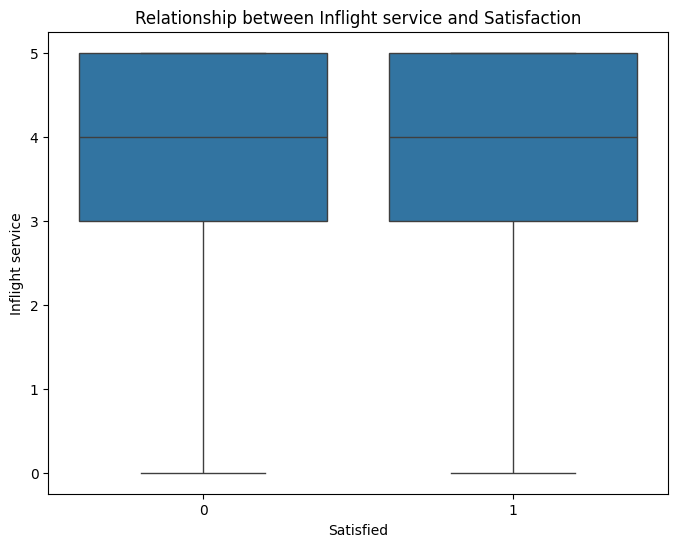

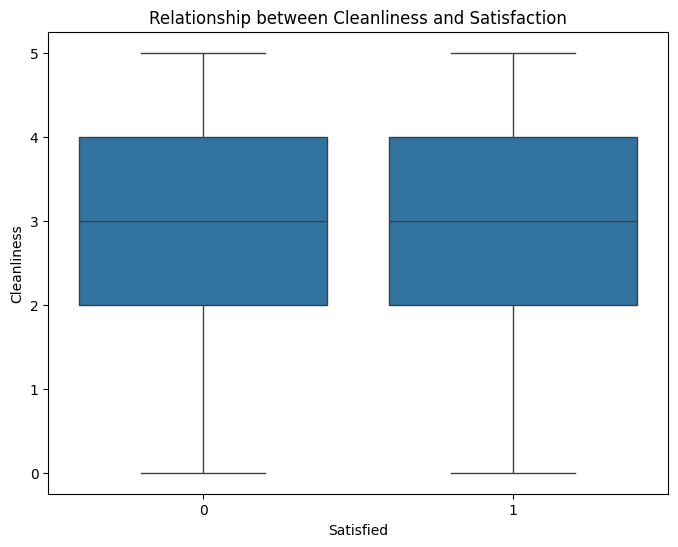

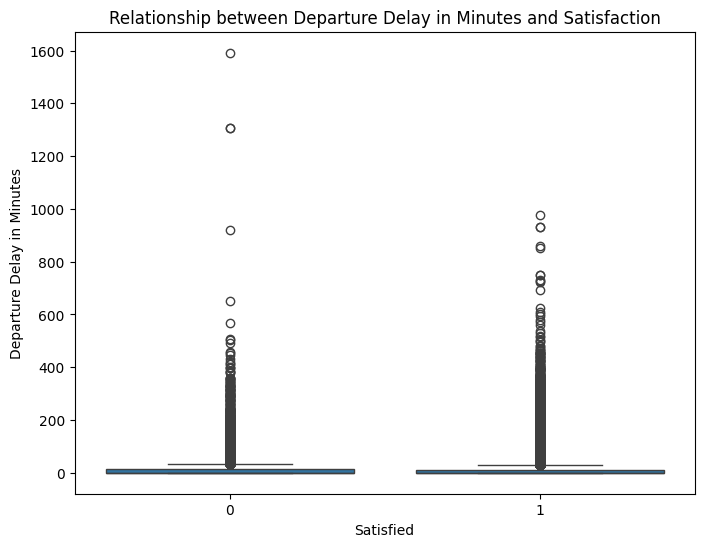

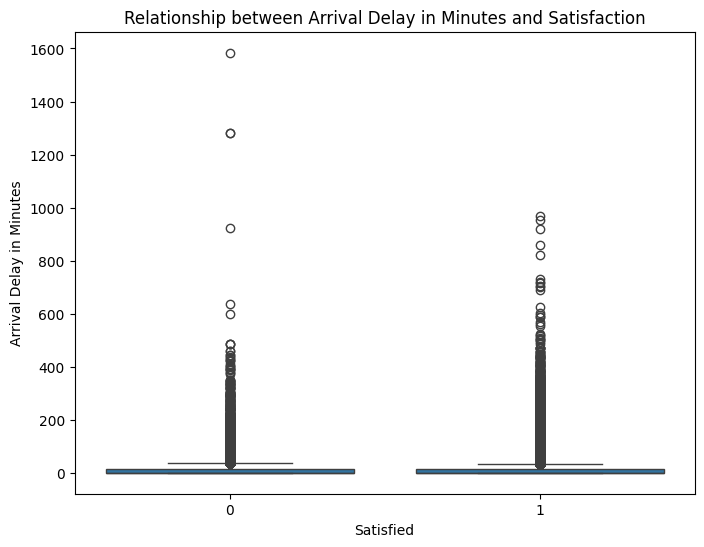

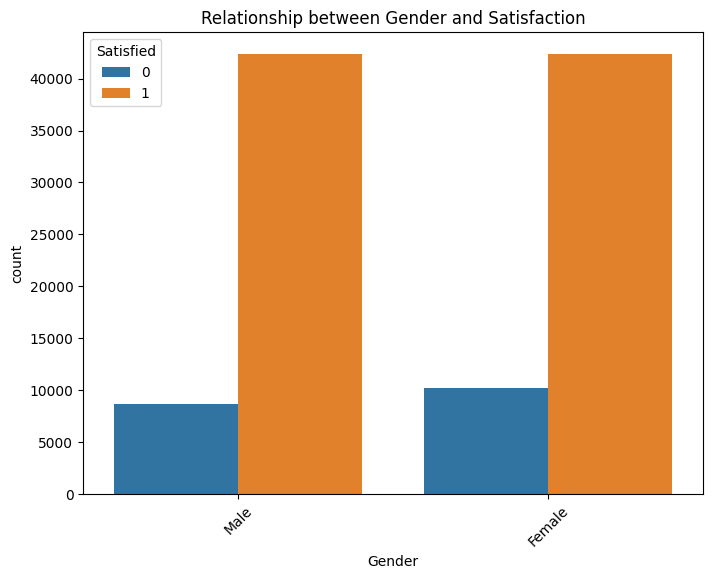

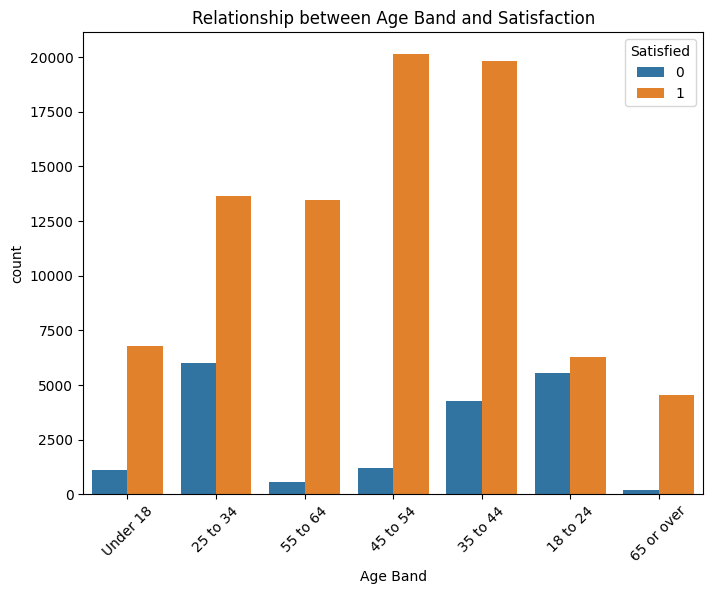

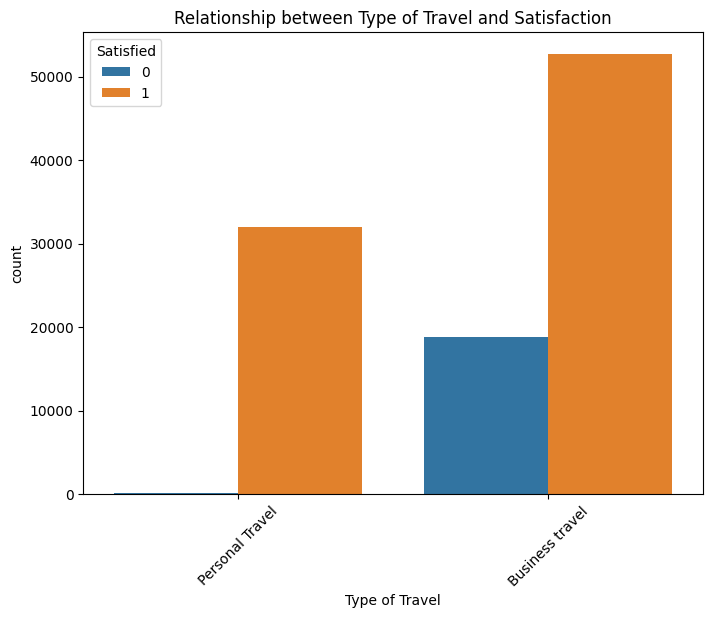

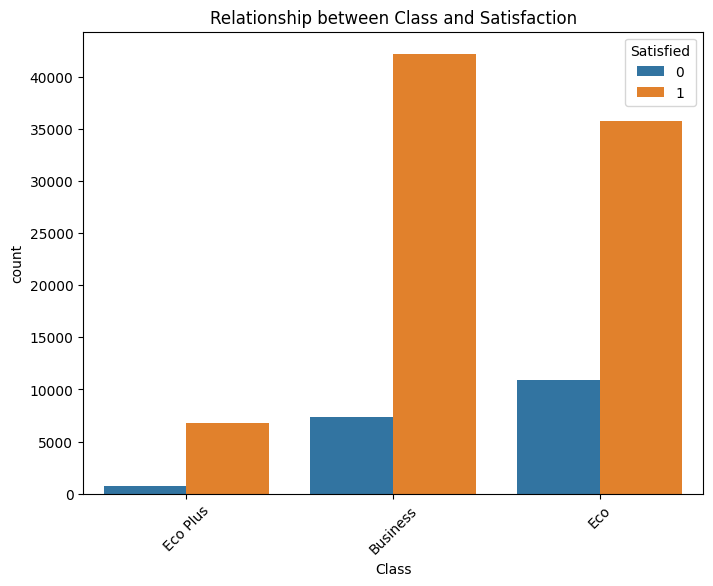

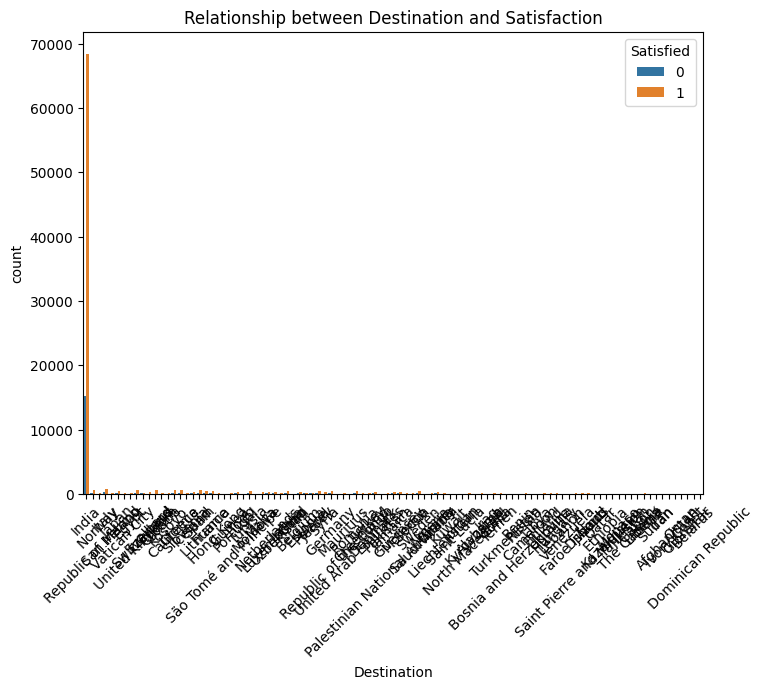

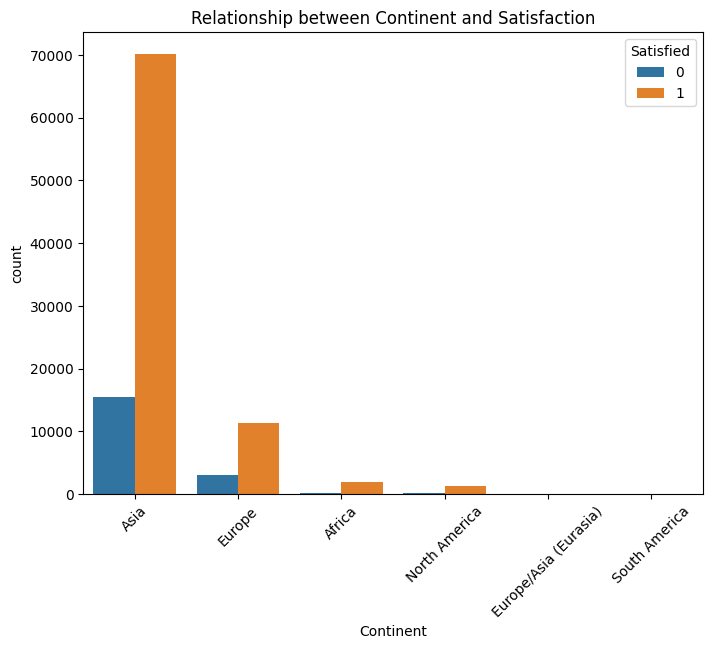

In [92]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns # Added import for seaborn

# Drop rows with missing values (if any)
data.dropna(inplace=True)

# Explore data distribution for numerical features
numerical_features = data.select_dtypes(include=np.number).columns
for feature in numerical_features:
  plt.figure(figsize=(8, 6))
  sns.histplot(data[feature], kde=True)
  plt.title(f'Distribution of {feature}')
  plt.show()

# Explore data distribution for categorical features
categorical_features = data.select_dtypes(include='object').columns
for feature in categorical_features:
  plt.figure(figsize=(8, 6))
  sns.countplot(x=feature, data=data)
  plt.title(f'Distribution of {feature}')
  plt.xticks(rotation=45)
  plt.show()

# Analyze correlation between features
correlation_matrix = data.corr(numeric_only=True) # Added numeric_only=True
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Explore relationship between features and target variable
for feature in numerical_features:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x='Satisfied', y=feature, data=data)
  plt.title(f'Relationship between {feature} and Satisfaction')
  plt.show()

for feature in categorical_features:
  plt.figure(figsize=(8, 6))
  sns.countplot(x=feature, hue='Satisfied', data=data)
  plt.title(f'Relationship between {feature} and Satisfaction')
  plt.xticks(rotation=45)
  plt.show()

In [93]:
data = pd.get_dummies(data, drop_first=True)


In [96]:
#Train test Split
X = data.drop('Satisfied', axis=1)  # Replace 'target_column' with your actual target column
y = data['Satisfied']




In [98]:
#  train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3736
           1       0.99      1.00      1.00     16983

    accuracy                           0.99     20719
   macro avg       0.99      0.98      0.99     20719
weighted avg       0.99      0.99      0.99     20719

ROC AUC: 0.9839107040659503


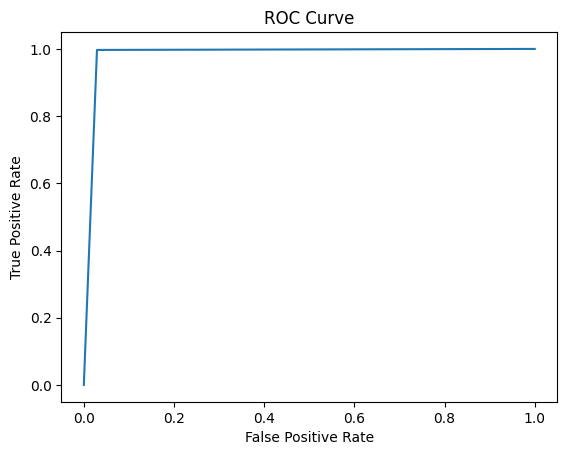

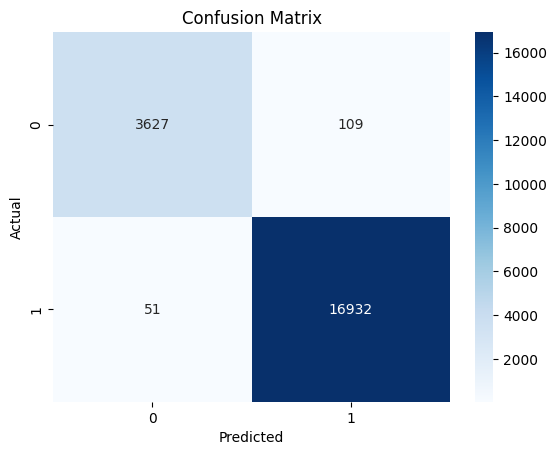

In [100]:

import matplotlib.pyplot as plt
# Install xgboost if not already installed
!pip install xgboost

from xgboost import XGBClassifier

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC: {roc_auc}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


              precision    recall  f1-score   support

           0       0.98      0.92      0.95      3736
           1       0.98      1.00      0.99     16983

    accuracy                           0.98     20719
   macro avg       0.98      0.96      0.97     20719
weighted avg       0.98      0.98      0.98     20719

ROC AUC (Random Forest): 0.9601982162285727


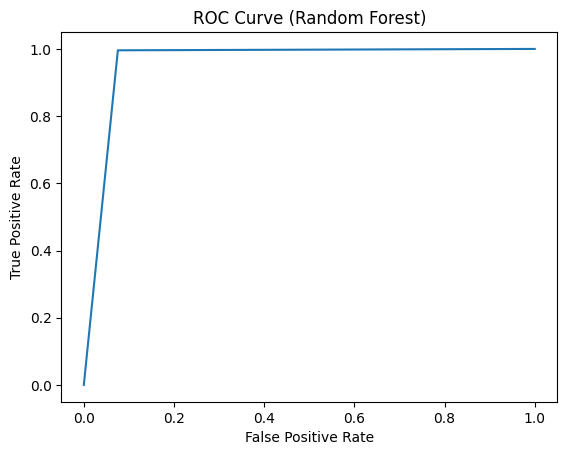

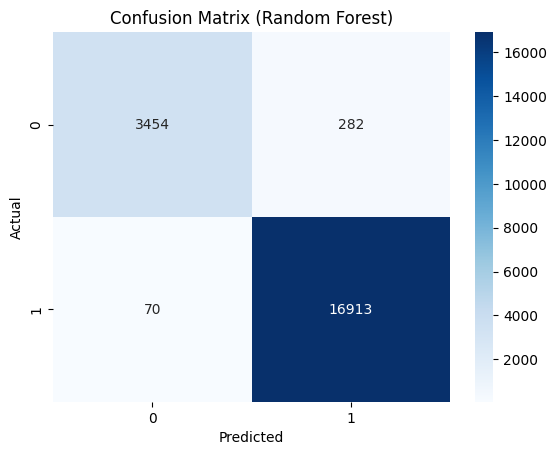

In [101]:


import matplotlib.pyplot as plt
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_rf))

# Calculate ROC AUC score
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
print(f'ROC AUC (Random Forest): {roc_auc_rf}')

# Plot ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
plt.plot(fpr_rf, tpr_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
plt.show()

# Generate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.show()


In [102]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have already trained your XGBoost model and have y_test and y_pred

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("XGBoost Classifier Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


XGBoost Classifier Evaluation Metrics:
Accuracy: 0.9922776195762344
Precision: 0.9936036617569391
Recall: 0.996996996996997
F1-Score: 0.9952974371032213


In [103]:

from sklearn.metrics import roc_auc_score

# Assuming you have already trained your XGBoost model and have y_test and y_pred

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Print the ROC AUC score
print("ROC AUC Score for XGBoost Classifier:", roc_auc)


ROC AUC Score for XGBoost Classifier: 0.9839107040659503


In [104]:
# Evaluation Metrics for Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      3736
           1       0.98      1.00      0.99     16983

    accuracy                           0.98     20719
   macro avg       0.98      0.96      0.97     20719
weighted avg       0.98      0.98      0.98     20719



In [106]:


# Calculate ROC AUC score for Random Forest
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

# Print the ROC AUC score for Random Forest
print("ROC AUC Score for Random Forest Classifier:", roc_auc_rf)


ROC AUC Score for Random Forest Classifier: 0.9601982162285727


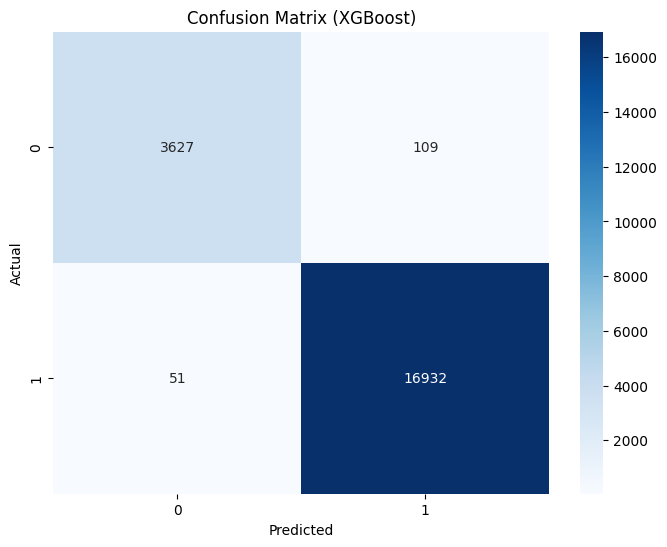

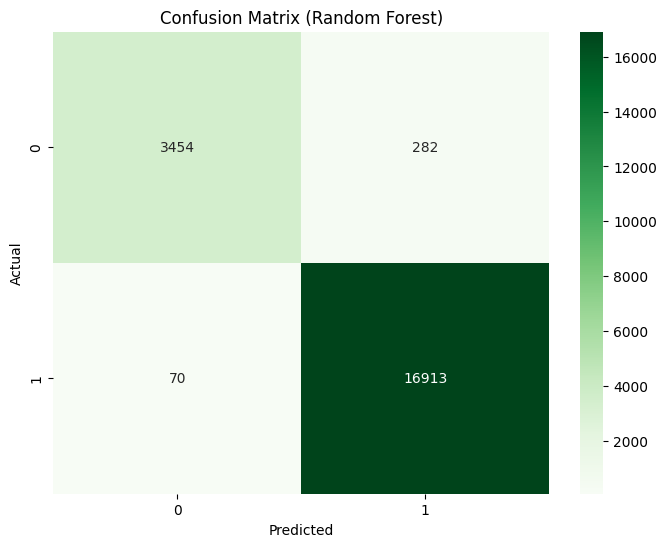

In [109]:

import matplotlib.pyplot as plt
# Generate confusion matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (XGBoost)')
plt.show()

# Generate confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.show()


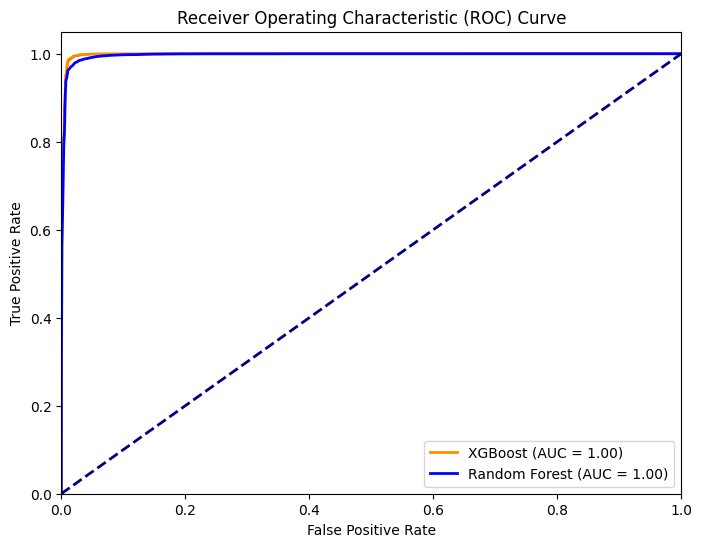

In [110]:

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Generate ROC curve for XGBoost
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Generate ROC curve for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curves for both models
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label='XGBoost (AUC = %0.2f)' % roc_auc_xgb)
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


                                        Feature    Importance
4                         Inflight wifi service  1.775732e-01
27               Type of Travel_Personal Travel  1.403733e-01
2                                           Age  9.080477e-02
5             Departure/Arrival time convenient  6.621306e-02
28                                    Class_Eco  5.600412e-02
..                                          ...           ...
113                            Destination_Séné  2.700987e-06
112           Destination_São Tomé and Príncipe  2.597527e-06
92   Destination_Palestinian National Authority  2.503337e-06
95                            Destination_Qatar  1.092201e-06
42               Destination_Dominican Republic  9.660840e-07

[133 rows x 2 columns]


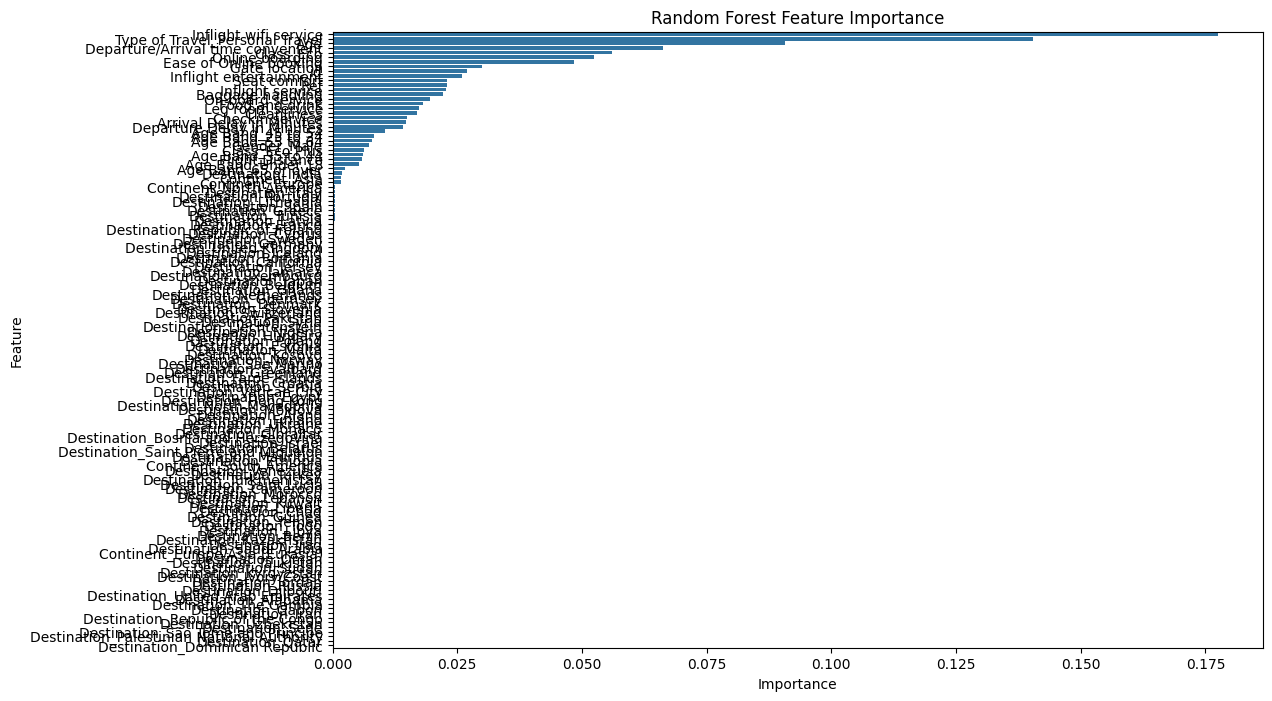

In [112]:

import pandas as pd
import matplotlib.pyplot as plt
# Get feature importances from the trained Random Forest model
importances = rf_model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(feature_importances_df)

# Visualize feature importances using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


                            Feature  Importance
27   Type of Travel_Personal Travel    0.269391
28                        Class_Eco    0.216283
4             Inflight wifi service    0.167925
6            Ease of Online booking    0.064381
29                   Class_Eco Plus    0.050908
..                              ...         ...
62                 Destination_Iraq    0.000000
61                 Destination_Iran    0.000000
58              Destination_Hungary    0.000000
57            Destination_Hong Kong    0.000000
132         Continent_South America    0.000000

[133 rows x 2 columns]


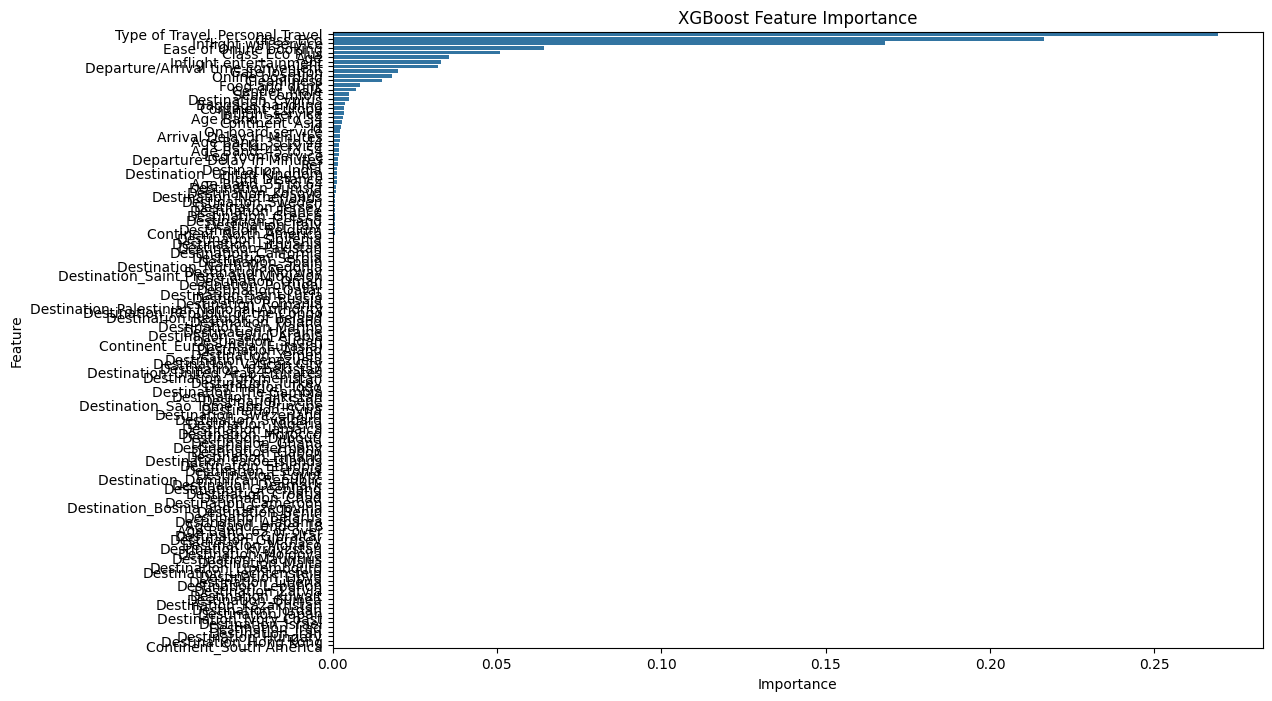

In [113]:

import pandas as pd
import matplotlib.pyplot as plt
# Get feature importances from the trained XGBoost model
importances = xgb_model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(feature_importances_df)

# Visualize feature importances using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



XGBoost Model Performance:
Accuracy: 0.9922776195762344
Precision: 0.9936036617569391
Recall: 0.996996996996997
F1-Score: 0.9952974371032213
ROC AUC: 0.9839107040659503

Random Forest Model Performance:
Accuracy: 0.9830107630677156
Precision: 0.9835998836871184
Recall: 0.9958782311723489
F1-Score: 0.9897009772368192
ROC AUC: 0.9601982162285727


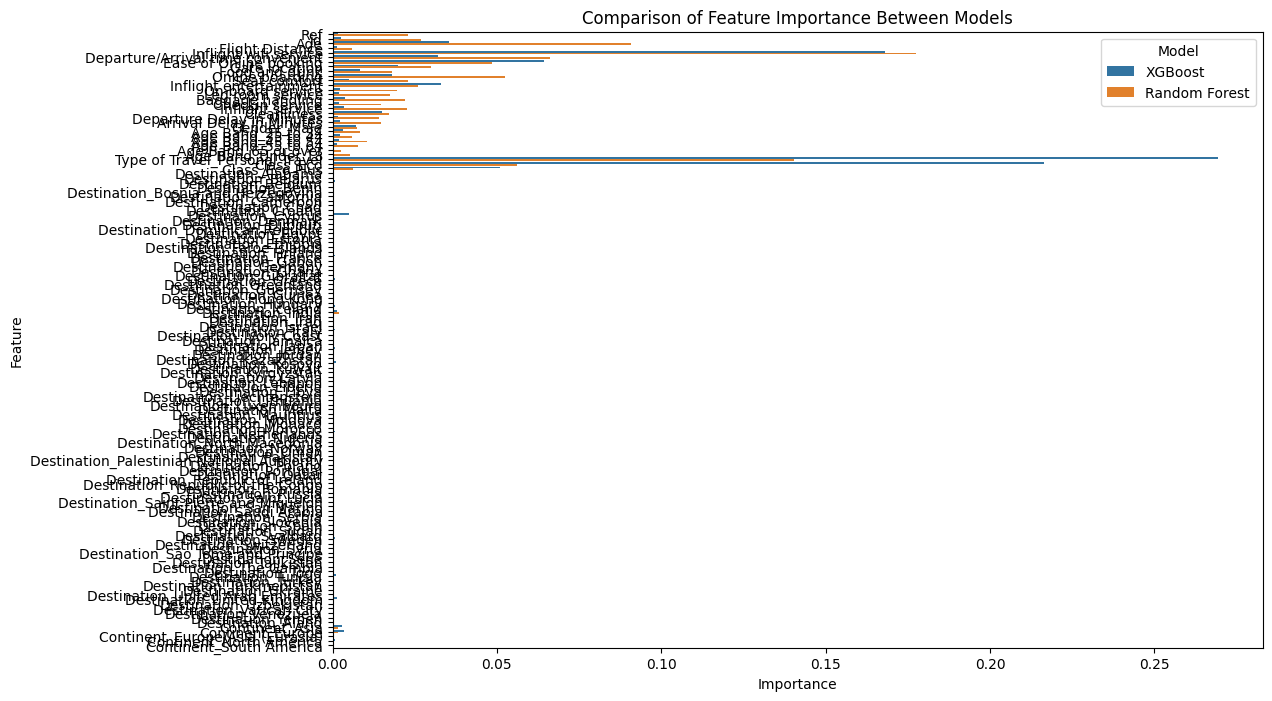

In [114]:

import pandas as pd
import matplotlib.pyplot as plt
# Analyze model performance using different metrics
def analyze_model(model, model_name, X_test, y_test):
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_pred)

  print(f"\n{model_name} Model Performance:")
  print("Accuracy:", accuracy)
  print("Precision:", precision)
  print("Recall:", recall)
  print("F1-Score:", f1)
  print("ROC AUC:", roc_auc)


# Analyze both XGBoost and Random Forest models
analyze_model(xgb_model, "XGBoost", X_test, y_test)
analyze_model(rf_model, "Random Forest", X_test, y_test)


# Compare feature importances
def compare_feature_importance(model1, model2, model_name1, model_name2, X_train):
  importances1 = model1.feature_importances_
  importances2 = model2.feature_importances_

  feature_importances_df1 = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances1, 'Model': model_name1})
  feature_importances_df2 = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances2, 'Model': model_name2})

  feature_importances_df = pd.concat([feature_importances_df1, feature_importances_df2])

  plt.figure(figsize=(12, 8))
  sns.barplot(x='Importance', y='Feature', hue='Model', data=feature_importances_df)
  plt.title('Comparison of Feature Importance Between Models')
  plt.xlabel('Importance')
  plt.ylabel('Feature')
  plt.show()

compare_feature_importance(xgb_model, rf_model, "XGBoost", "Random Forest", X_train)
